In [1]:
# import the libraries I need for data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv files
df_store = pd.read_csv('store.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/3455157568.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


In [3]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
print('store_shape: ' ,df_store.shape)
print('train_shape: ', df_train.shape)
print('test_shape: ', df_test.shape)

store_shape:  (1115, 10)
train_shape:  (1017209, 9)
test_shape:  (41088, 8)


In [7]:
print('store_describe: ')
print(df_store.describe)
print('train_describe: ')
print(df_train.describe)
print('test_describe: ')
print(df_test.describe)

store_describe: 
<bound method NDFrame.describe of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0

In [8]:
print('store_info: ')
print(df_store.info)
print('train_info: ')
print(df_train.info)
print('test_describe: ')
print(df_test.info)

store_info: 
<bound method DataFrame.info of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0      

In [9]:
# merge df_store dataset with df_train and df_test
merged_df = df_train.merge(df_store, how='left', on = 'Store')
merged_test_df = df_test.merge(df_store, how='left', on = 'Store')

In [10]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
# transform 'Date' to datetime, and divide 'Date' into 'year', 'month' and 'day' elements
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['day'] = merged_df['Date'].dt.day

merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'])
merged_test_df['year'] = merged_test_df['Date'].dt.year
merged_test_df['month'] = merged_test_df['Date'].dt.month
merged_test_df['day'] = merged_test_df['Date'].dt.day

In [14]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1


In [15]:
# calcualte the duration of competition and put calculated values into 'CompetitionTime' column
merged_df['CompetitionTime'] = (merged_df.year - merged_df['CompetitionOpenSinceYear']) * 12 + (merged_df.month - merged_df['CompetitionOpenSinceMonth'])
merged_test_df['CompetitionTime'] = (merged_test_df.year - merged_test_df['CompetitionOpenSinceYear']) * 12 + (merged_test_df.month - merged_test_df['CompetitionOpenSinceMonth'])


In [16]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionTime
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,-17.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,81.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,NaN


In [17]:
# fill the negative value and null value with 0
def check_comp(x):

    if x < 0 :

        return 0 
    else:
        return x
    
merged_df['CompetitionTime'] = merged_df['CompetitionTime'].apply(check_comp)
merged_df['CompetitionTime'].fillna(0, inplace=True)

merged_test_df['CompetitionTime'] = merged_test_df['CompetitionTime'].apply(check_comp)
merged_test_df['CompetitionTime'].fillna(0, inplace=True)

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/2478846943.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['CompetitionTime'].fillna(0, inplace=True)
/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/2478846943.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [18]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionTime
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,81.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,0.0


In [19]:
# calculate the duration of Promo2
merged_df['Promo2Time'] = (merged_df.year - merged_df['Promo2SinceYear']) * 12 
merged_test_df['Promo2Time'] = (merged_test_df.year - merged_test_df['Promo2SinceYear']) * 12 

In [20]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionTime,Promo2Time
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0,60.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0,48.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0.0,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,NaN,NaN,NaN,2013,1,1,81.0,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,0.0,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,0.0,NaN


In [21]:
merged_df['Promo2Time'].value_counts()

Promo2Time
 24.0    98597
 12.0    90929
 36.0    81732
 48.0    73093
 0.0     71027
-12.0    37957
 60.0    36717
 72.0    15476
-24.0     3650
Name: count, dtype: int64

In [22]:
# see why there is negative values.
# the promotin is later than the sales, it means that it has no effect on current sales.

merged_df[merged_df['Promo2Time'] < 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionTime,Promo2Time
236404,28,3,2014-12-31,1713,214,1,0,0,1,a,...,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,12,31,2.0,-12.0
236597,265,3,2014-12-31,4009,395,1,0,0,1,a,...,NaN,1,14.0,2015.0,"Jan,Apr,Jul,Oct",2014,12,31,0.0,-12.0
236653,331,3,2014-12-31,2880,349,1,0,0,1,a,...,NaN,1,14.0,2015.0,"Jan,Apr,Jul,Oct",2014,12,31,0.0,-12.0
237001,749,3,2014-12-31,3155,382,1,0,0,1,a,...,2011.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct",2014,12,31,40.0,-12.0
237108,872,3,2014-12-31,4822,428,1,0,0,1,a,...,2014.0,1,23.0,2015.0,"Mar,Jun,Sept,Dec",2014,12,31,3.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017173,1080,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2013,1,1,0.0,-12.0
1017185,1092,2,2013-01-01,0,0,0,0,a,1,a,...,2000.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2013,1,1,150.0,-12.0
1017187,1094,2,2013-01-01,0,0,0,0,a,1,d,...,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2013,1,1,0.0,-12.0
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2013,1,1,0.0,-12.0


In [23]:
# fill the negative value and null value with 0
merged_df['Promo2Time'].fillna(0, inplace=True)
merged_df['Promo2Time'] = merged_df['Promo2Time'].apply(lambda x : 0 if x < 0 else x)

merged_test_df['Promo2Time'].fillna(0, inplace=True)
merged_test_df['Promo2Time'] = merged_test_df['Promo2Time'].apply(lambda x : 0 if x < 0 else x)

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/806713349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Promo2Time'].fillna(0, inplace=True)
/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/806713349.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [24]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionTime,Promo2Time
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0,60.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0,48.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0.0,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,NaN,NaN,NaN,2013,1,1,81.0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,0.0,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,0.0,0.0


In [25]:
# check how many columns I have so far
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day',
       'CompetitionTime', 'Promo2Time'],
      dtype='object')

In [26]:
merged_df.year.value_counts()

year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64

title = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
         'SchoolHoliday', 'storetype', ]

In [27]:
# check null value
merged_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
CompetitionTime                   0
Promo2Time                        0
dtype: int64

In [28]:
# calculate the mean of 'CompetitionDistance' with null values
merged_df[merged_df['CompetitionDistance'].isnull()]['Sales'].mean()

4535.892884178653

In [29]:
# check the mean of 'Sales'
merged_df['Sales'].mean()

5773.818972305593

In [30]:
# check the distribution of 'Sales'
merged_df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [31]:
# check the distribution of 'CompetitionDistance'
merged_df['CompetitionDistance'].describe()

count    1.014567e+06
mean     5.430086e+03
std      7.715324e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.890000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [32]:
# fill the 35% quantile of 'CompetitionDistance' into null values
merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].quantile(q = 0.35), inplace=True)

merged_test_df['CompetitionDistance'].fillna(merged_test_df['CompetitionDistance'].quantile(q = 0.35), inplace=True)

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/3442973270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['CompetitionDistance'].fillna(merged_df['CompetitionDistance'].quantile(q = 0.35), inplace=True)
/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/3442973270.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

In [33]:
merged_df['CompetitionDistance'].isnull().sum()

0

In [34]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,CompetitionTime,Promo2Time
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0,60.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0,48.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0.0,0.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,NaN,NaN,NaN,2013,1,1,81.0,0.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,0.0,0.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,0.0,0.0


In [35]:
merged_test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'day', 'CompetitionTime', 'Promo2Time'],
      dtype='object')

## EDA (Explorary Data Analysis)

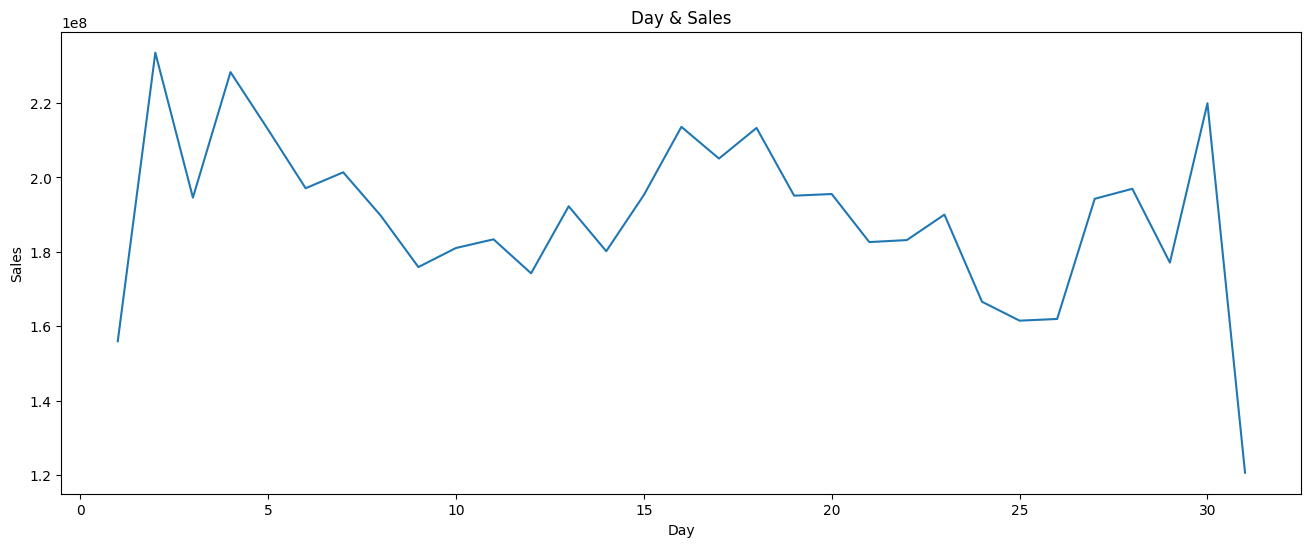

In [36]:
# most sales happened in the beginning, mid, late of the month
plt.figure(figsize=(16, 6))
merged_df.day.astype('int64')
plt.plot(merged_df.groupby(merged_df.day).Sales.sum())
plt.title('Day & Sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

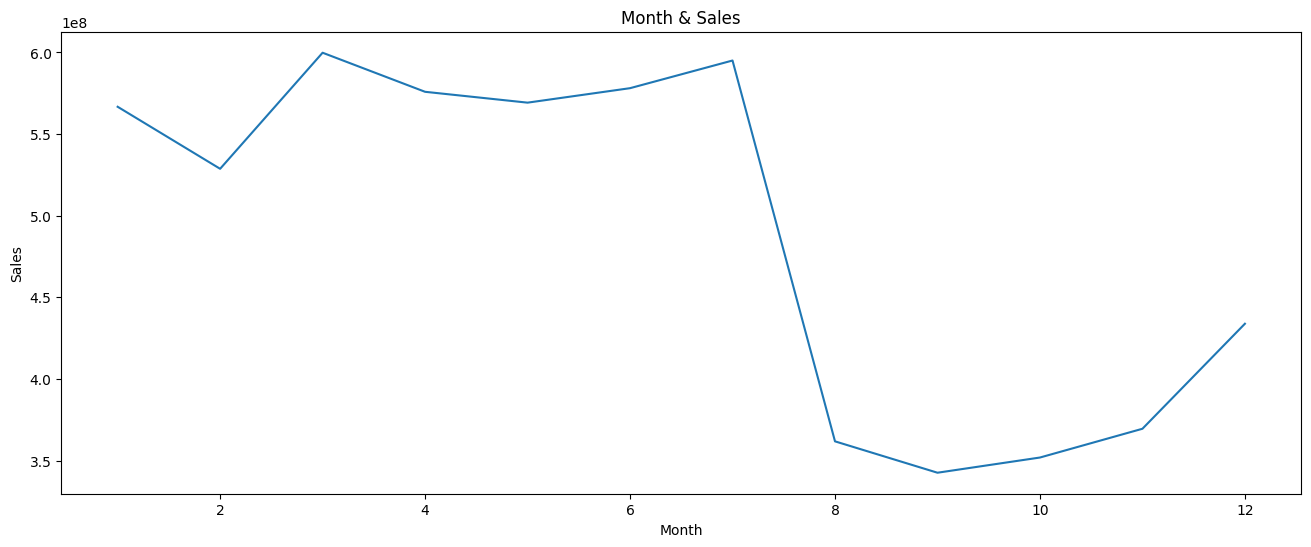

In [37]:
# Jan to July are the peak of sales.

plt.figure(figsize=(16, 6))
merged_df.month.astype('int64')
plt.plot(merged_df.groupby(merged_df.month).Sales.sum())
plt.title('Month & Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/663778808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp_df.Sales, palette='Blues')


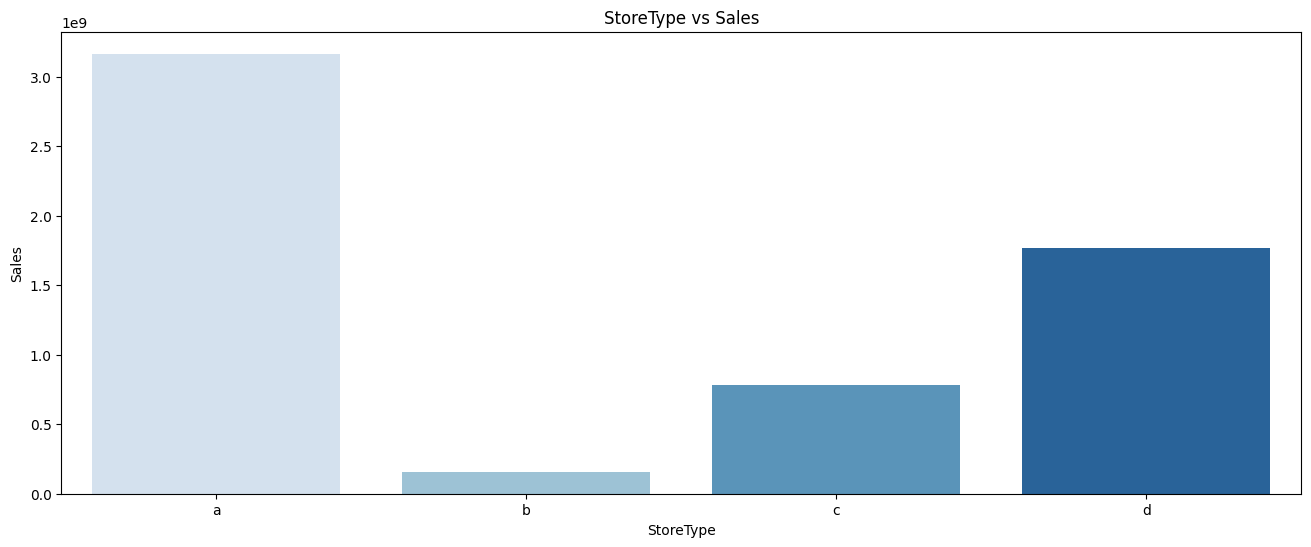

In [38]:
# Store a got most sales. 
plt.figure(figsize=(16,6))
temp_df = merged_df.groupby("StoreType", group_keys=True)[['Sales']].sum()
sns.barplot(temp_df.Sales, palette='Blues')
plt.title("StoreType vs Sales")
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.show()



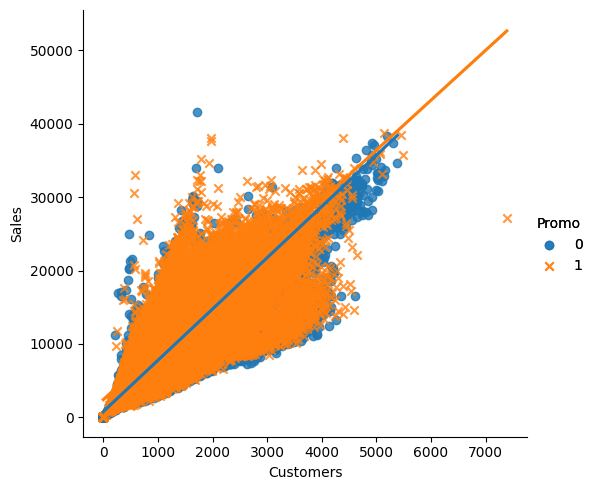

In [39]:
# check the effectiveness of Promo
g = sns.lmplot(x='Customers', y='Sales', hue='Promo', markers=['o', 'x'], data=merged_df)
g.add_legend()

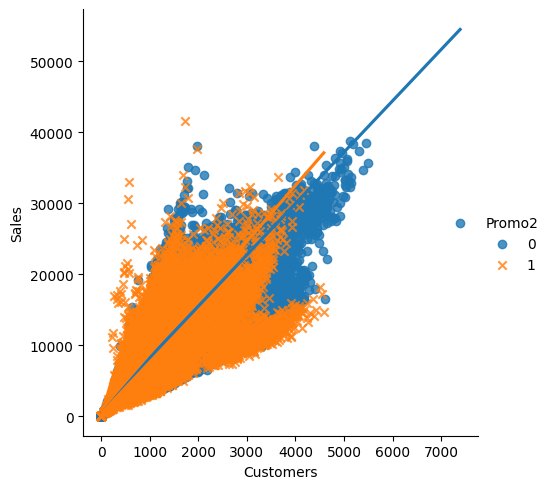

In [40]:
# check the effectiveness of Promo2
g1 = sns.lmplot(x='Customers', y='Sales', hue='Promo2', markers=['o', 'x'], data=merged_df)

<Axes: xlabel='CompetitionTime', ylabel='Sales'>

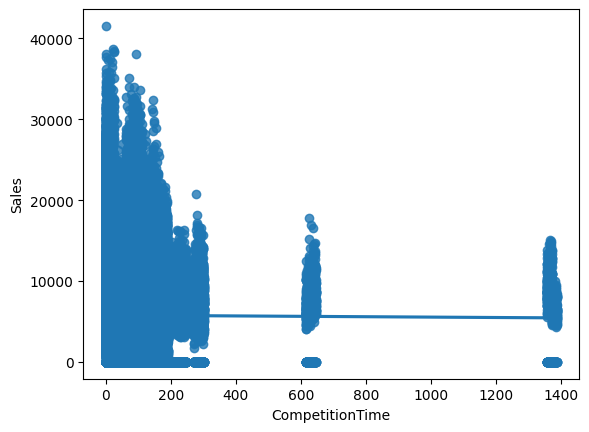

In [41]:
# check the relationship between 'CompetitionTime' & 'Sales'
sns.regplot(x='CompetitionTime', y='Sales', data=merged_df)

In [42]:
merged_df.CompetitionTime.value_counts()

CompetitionTime
0.0       413519
7.0         6454
6.0         6444
4.0         6403
8.0         6374
           ...  
199.0         28
1369.0        28
616.0         28
1357.0        28
628.0         28
Name: count, Length: 336, dtype: int64

<Axes: xlabel='Promo2Time', ylabel='Sales'>

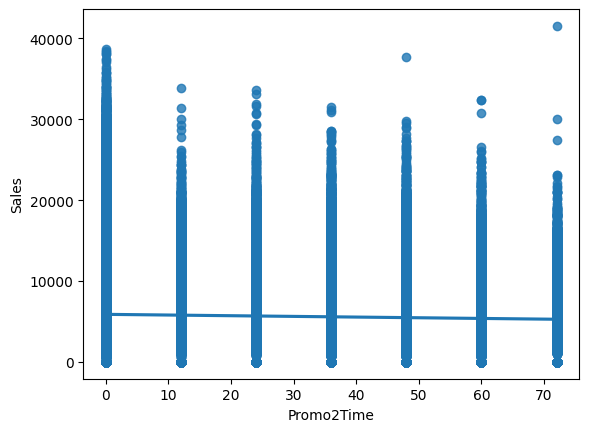

In [43]:
# check the relationship between 'Promo2Time' & 'Sales'
sns.regplot(x='Promo2Time', y='Sales', data=merged_df)

In [44]:
merged_df.Promo2Time.value_counts()

Promo2Time
0.0     620665
24.0     98597
12.0     90929
36.0     81732
48.0     73093
60.0     36717
72.0     15476
Name: count, dtype: int64

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_22656/445573566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp_df.Sales, palette='Blues')


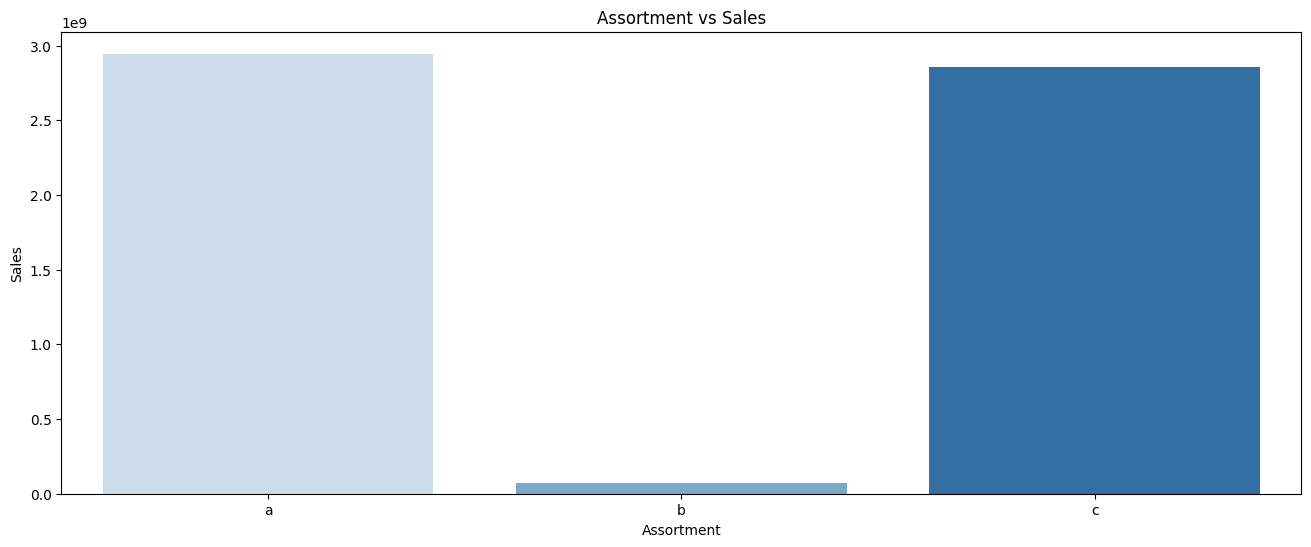

In [45]:
# assortment a & c got most sales

plt.figure(figsize=(16,6))
temp_df = merged_df.groupby("Assortment", group_keys=True)[['Sales']].sum()
sns.barplot(temp_df.Sales, palette='Blues')
plt.title("Assortment vs Sales")
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.show()

In [46]:
# scale numeric values to range 0 to 1


from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Store', 'DayOfWeek', 'Open',  'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'CompetitionTime', 'Promo2Time' ]


scaler = MinMaxScaler().fit(merged_df[numeric_columns])

merged_df[numeric_columns] = scaler.transform(merged_df[numeric_columns])

merged_test_df[numeric_columns] = scaler.transform(merged_test_df[numeric_columns])

In [47]:
# encode categorical values

from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['StateHoliday', 'StoreType', 'Assortment']

merged_df[categorical_columns] = merged_df[categorical_columns].astype('str')
merged_test_df[categorical_columns] = merged_test_df[categorical_columns].astype('str')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(merged_df[categorical_columns])

encoded_columns = list(encoder.get_feature_names_out(categorical_columns))

merged_df[encoded_columns] = encoder.transform(merged_df[categorical_columns])

merged_test_df[encoded_columns] = encoder.transform(merged_test_df[categorical_columns])

In [48]:
X = merged_df[numeric_columns + encoded_columns]
Y = merged_df['Sales']

In [49]:
# split the training, validation and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)


print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)
print('Shape of y_val:', y_val.shape)

Shape of X_train: (732390, 20)
Shape of X_test: (203442, 20)
Shape of X_val: (81377, 20)
Shape of y_train: (732390,)
Shape of y_test: (203442,)
Shape of y_val: (81377,)


In [50]:
X.dtypes

Store                  float64
DayOfWeek              float64
Open                   float64
Promo                  float64
SchoolHoliday          float64
CompetitionDistance    float64
Promo2                 float64
CompetitionTime        float64
Promo2Time             float64
StateHoliday_0         float64
StateHoliday_a         float64
StateHoliday_b         float64
StateHoliday_c         float64
StoreType_a            float64
StoreType_b            float64
StoreType_c            float64
StoreType_d            float64
Assortment_a           float64
Assortment_b           float64
Assortment_c           float64
dtype: object

In [51]:
Y.shape

(1017209,)

/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/10


/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11444/11444 ━━━━━━━━━━━━━━━━━━━━ 4s 318us/step - loss: 3401.8811 - mean_absolute_error: 3401.8811 - val_loss: 1714.9843 - val_mean_absolute_error: 1714.9843
Epoch 2/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 296us/step - loss: 1702.7667 - mean_absolute_error: 1702.7667 - val_loss: 1706.7928 - val_mean_absolute_error: 1706.7928
Epoch 3/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 4s 306us/step - loss: 1701.4364 - mean_absolute_error: 1701.4364 - val_loss: 1705.8073 - val_mean_absolute_error: 1705.8073
Epoch 4/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 293us/step - loss: 1695.1484 - mean_absolute_error: 1695.1484 - val_loss: 1704.9761 - val_mean_absolute_error: 1704.9761
Epoch 5/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 297us/step - loss: 1693.6527 - mean_absolute_error: 1693.6527 - val_loss: 1704.3184 - val_mean_absolute_error: 1704.3184
Epoch 6/10
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 293us/step - loss: 1696.7330 - mean_absolute_error: 1696.7330 - val_loss: 1704.6119 - val_mean_absolute_error: 1704.6119
Epo

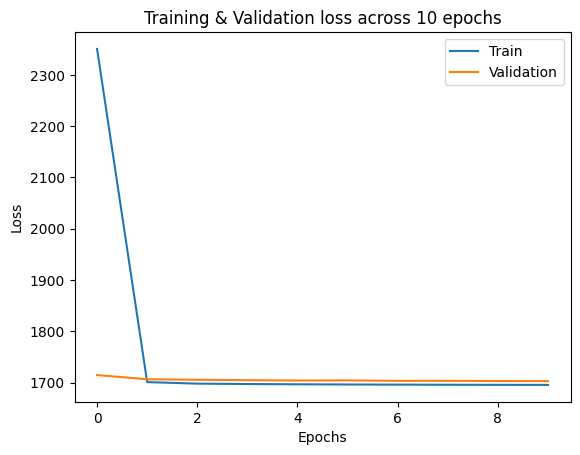

In [52]:
# train the model using Adam optimiser and show the graph of training process 

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(150, input_dim=20, activation='relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training & Validation loss across 10 epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



Epoch 1/20


/Users/youweicheng/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11444/11444 ━━━━━━━━━━━━━━━━━━━━ 4s 309us/step - loss: 3411.8721 - mean_absolute_error: 3411.8721 - val_loss: 1711.4640 - val_mean_absolute_error: 1711.4640
Epoch 2/20
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 4s 313us/step - loss: 1700.2649 - mean_absolute_error: 1700.2649 - val_loss: 1692.8278 - val_mean_absolute_error: 1692.8278
Epoch 3/20
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 4s 312us/step - loss: 1681.8163 - mean_absolute_error: 1681.8163 - val_loss: 1683.8641 - val_mean_absolute_error: 1683.8641
Epoch 4/20
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 297us/step - loss: 1670.1760 - mean_absolute_error: 1670.1760 - val_loss: 1678.8518 - val_mean_absolute_error: 1678.8518
Epoch 5/20
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 295us/step - loss: 1670.5503 - mean_absolute_error: 1670.5503 - val_loss: 1674.9178 - val_mean_absolute_error: 1674.9178
Epoch 6/20
11444/11444 ━━━━━━━━━━━━━━━━━━━━ 3s 298us/step - loss: 1666.4454 - mean_absolute_error: 1666.4454 - val_loss: 1671.5701 - val_mean_absolute_error: 1671.5701
Epo

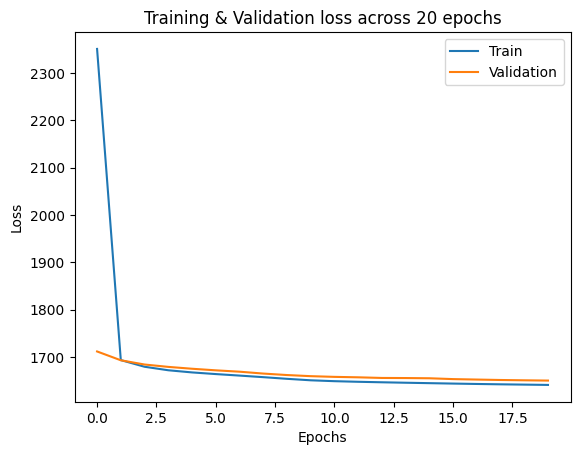

In [54]:
# try to increase the epochs to 20 and see how it works

history = History()
model = Sequential()
model.add(Dense(150, input_dim=20, activation='relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training & Validation loss across 20 epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



In [55]:
# evaluate the model performance 

result = model.evaluate(X_test, y_test)

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step - loss: 1637.7665 - mean_absolute_error: 1637.7665


In [56]:
# make prediction

prediction = model.predict(X)


31788/31788 ━━━━━━━━━━━━━━━━━━━━ 7s 218us/step


In [57]:
prediction = prediction.reshape(1017209, )
prediction.shape

(1017209,)

In [58]:
Y.shape

(1017209,)

In [66]:
# show the values of predicting and real values

df = pd.DataFrame(prediction.round(), columns=['prediction'])
df['real_sales'] = Y
df


,prediction,real_sales
0,7659.0,5263
1,7325.0,6064
2,7154.0,8314
3,7797.0,13995
4,7273.0,4822
...,...,...
1017204,84.0,0
1017205,222.0,0
1017206,226.0,0
1017207,226.0,0
